In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/preprocessed_tweets.csv',lineterminator='\n')

In [ ]:
data.head()

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(data,data,random_state=104, test_size=0.25, shuffle=True)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97630 entries, 74674 to 8261
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       97630 non-null  int64  
 1   id               97630 non-null  int64  
 2   conversation_id  97630 non-null  int64  
 3   created_at       97630 non-null  object 
 4   date             97630 non-null  object 
 5   time             97630 non-null  object 
 6   timezone         97630 non-null  int64  
 7   user_id          97630 non-null  int64  
 8   username         97630 non-null  object 
 9   name             97627 non-null  object 
 10  place            154 non-null    object 
 11  tweet            97630 non-null  object 
 12  language         97630 non-null  object 
 13  mentions         97630 non-null  object 
 14  urls             97630 non-null  object 
 15  photos           97630 non-null  object 
 16  replies_count    97630 non-null  int64  
 17  retweets_

In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32544 entries, 73660 to 16902
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       32544 non-null  int64  
 1   id               32544 non-null  int64  
 2   conversation_id  32544 non-null  int64  
 3   created_at       32544 non-null  object 
 4   date             32544 non-null  object 
 5   time             32544 non-null  object 
 6   timezone         32544 non-null  int64  
 7   user_id          32544 non-null  int64  
 8   username         32544 non-null  object 
 9   name             32544 non-null  object 
 10  place            41 non-null     object 
 11  tweet            32544 non-null  object 
 12  language         32544 non-null  object 
 13  mentions         32544 non-null  object 
 14  urls             32544 non-null  object 
 15  photos           32544 non-null  object 
 16  replies_count    32544 non-null  int64  
 17  retweets

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
sns.set()
import re
import nltk
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

# converter
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

# hide warnings
import warnings
warnings.filterwarnings('ignore')


# html embedding
from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

In [ ]:
X_train.isnull().any()

In [ ]:
for df in [X_train,X_test]:
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'https?://[A-Za-z0-9/:.]+','*',x))
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'@[A-Za-z0-9/:._]+','@user',x))
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'[0-9]+','0',x))
    df['tweet'] = df['tweet'].apply(lambda x:re.sub(r'\s+',' ',x))
    df['hashtags'] = df['hashtags'].str.replace('%20','_')
    df['tweet'] = df['tweet'] + df['tweet'].apply(lambda x: ' #' + x if not(x is np.nan) else '' )

In [ ]:
train=X_train[["id","tweet","hashtags","video"]]
test=X_test[["id","tweet","hashtags","video"]]

In [ ]:
train[train['video'] == 1].head(10)

,id,tweet,hashtags,video
115806,1589729696593244160,MLB continues Hurricane Watch for Inland South...,[],1
127371,1589461498531024896,Florida Can by House of Beer Pale Ale - (Hurri...,[],1
7150,1592207172389244930,Welcome to the Amherst Hurricanes Boosters pag...,[],1
130056,1589372161529204736,Ron DeSanctimonious' worst fault is he won't a...,[],1
94620,1590143779310534656,Me rushing to Beat Buy tomorrow for my SV Poké...,[],1
101666,1590043487910916096,#hurricaneseason0 is not over yet. #TropicalSt...,"['hurricaneseason2022', 'tropicalstorm', 'cate...",1
6616,1592232502206291969,some of y’all y’all stay thinking the United S...,[],1
32125,1591061022357393408,In case you missed it... A parody National Wea...,[],1
62981,1590562570041462790,Hurricane Nicole getting ready to make landfal...,[],1
59374,1590624434268045314,@user @user @user The eye is nearly there. If ...,[],1


In [ ]:
train[train['video'] == 0].head(10)


,id,tweet,hashtags,video
74674,1590463779166629888,"""Nicole nears hurricane strength as it churns ...",[],0
90246,1590205100639023104,@user @user Contrast DiSantis competence in de...,[],0
32932,1591040953124818949,@user @user Our climate is mild compared to ot...,[],0
22308,1591345779419275264,Nicole exiting eastern seaboard after historic...,[],0
79400,1590409327025999872,Well looks like the weather is seeing it's own...,['lottery'],0
109476,1589867666004754432,Hip hop legend Hurricane G dies aged 0 * #Hip ...,[],0
102268,1590033872066342914,@user Never going to happen. The hurricane man...,[],0
12267,1591852086253457408,@user #LearnWithMarcus This is easy restocking...,['learnwithmarcus'],0
17682,1591536761347665920,@user and the neofascist democrats are cheatin...,[],0
86128,1590333733034659840,He won big percentages across the board even w...,['midterms2022'],0


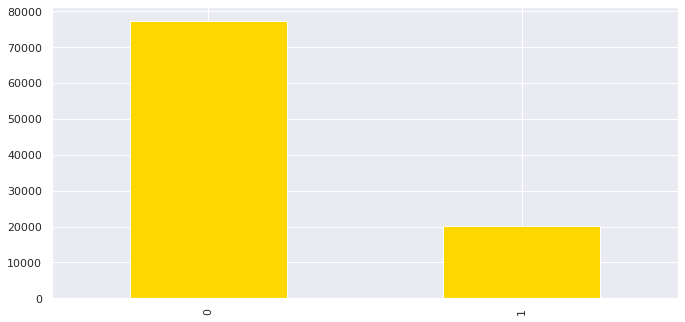

In [ ]:
train['video'].value_counts().plot.bar(color = 'gold', figsize = (10,5))

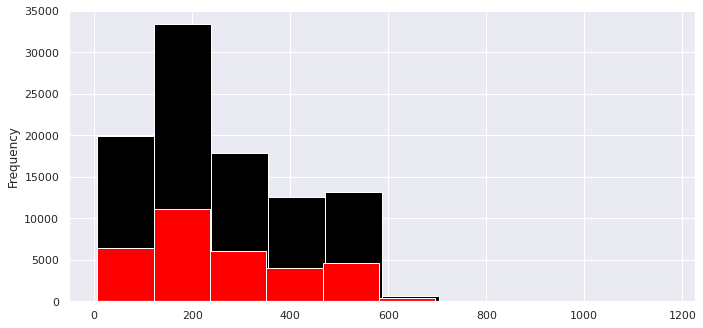

In [ ]:
# checking the distribution of tweets in the whole dataset

length_train = train['tweet'].str.len().plot.hist(color = 'black', figsize = (10, 5))
length_test = test['tweet'].str.len().plot.hist(color = 'red', figsize = (10,5))

In [ ]:

train['len'] = train['tweet'].str.len()
test['len'] =  test['tweet'].str.len()

In [ ]:
train.head(10)

,id,tweet,hashtags,video,len
74674,1590463779166629888,"""Nicole nears hurricane strength as it churns ...",[],0,296
90246,1590205100639023104,@user @user Contrast DiSantis competence in de...,[],0,328
32932,1591040953124818949,@user @user Our climate is mild compared to ot...,[],0,406
22308,1591345779419275264,Nicole exiting eastern seaboard after historic...,[],0,156
79400,1590409327025999872,Well looks like the weather is seeing it's own...,['lottery'],0,322
109476,1589867666004754432,Hip hop legend Hurricane G dies aged 0 * #Hip ...,[],0,82
102268,1590033872066342914,@user Never going to happen. The hurricane man...,[],0,154
12267,1591852086253457408,@user #LearnWithMarcus This is easy restocking...,['learnwithmarcus'],0,254
17682,1591536761347665920,@user and the neofascist democrats are cheatin...,[],0,128
86128,1590333733034659840,He won big percentages across the board even w...,['midterms2022'],0,348


In [ ]:
train.groupby('video').describe()

id                                                          \
         count          mean           std           min           25%   
video                                                                    
0      77372.0  1.590661e+18  7.522557e+14  1.585462e+18  1.590118e+18   
1      20258.0  1.590598e+18  7.564425e+14  1.584936e+18  1.590044e+18   

                                                     len              \
                50%           75%           max    count        mean   
video                                                                  
0      1.590555e+18  1.591070e+18  1.592616e+18  77372.0  249.400171   
1      1.590497e+18  1.590896e+18  1.592616e+18  20258.0  300.192714   

                                                      
              std   min    25%    50%    75%     max  
video                                                 
0      151.546058   6.0  130.0  208.0  350.0  1168.0  
1      158.420840  16.0  168.0  272.0  448.0  1116.0

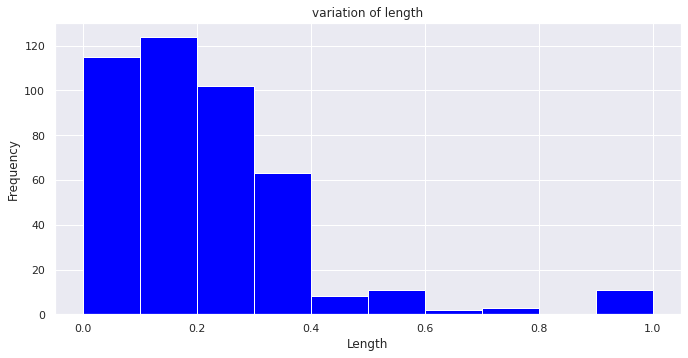

In [ ]:
train.groupby('len').mean()['video'].plot.hist(color ='blue',figsize = (10,5))
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

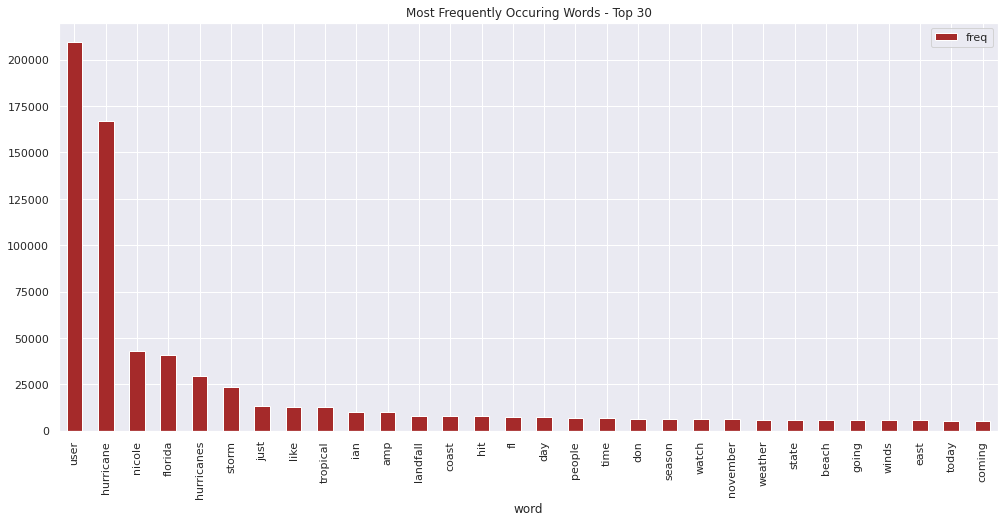

In [ ]:
# count vectorization for the text
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'brown')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

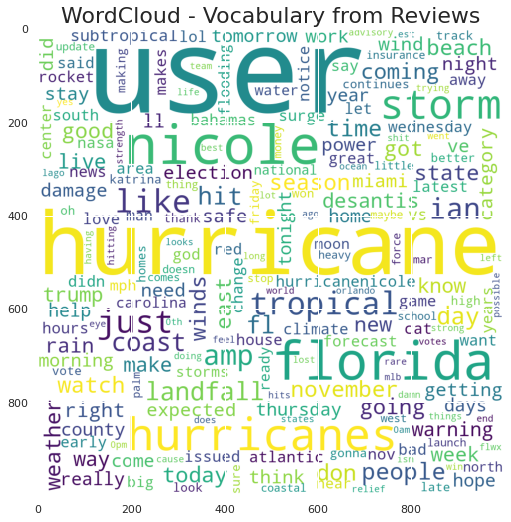

In [ ]:
# generating word cloud for the most common occuring words in the train data
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

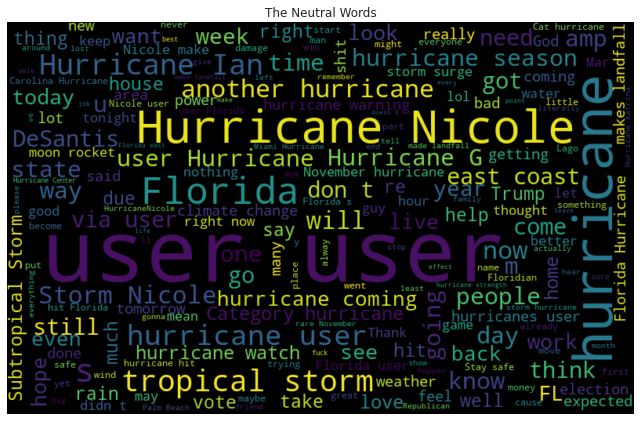

In [ ]:
# wordcloud for words that are neutral
normal_words =' '.join([text for text in train['tweet'][train['video'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [ ]:
# defining a function to collect the hashtags from the train data
def hashtags_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    
    return hashtags

In [ ]:
#extracting hashtags from racist/sexist tweet
ht_normal = hashtags_extract(train['tweet'][train['video'] == 0])

#extracting hashtags from normal tweet
ht_negetive = hashtags_extract(train['tweet'][train['video'] == 1])

#unnesting list

ht_normal = sum(ht_normal , [])
ht_negetive = sum(ht_negetive , [])

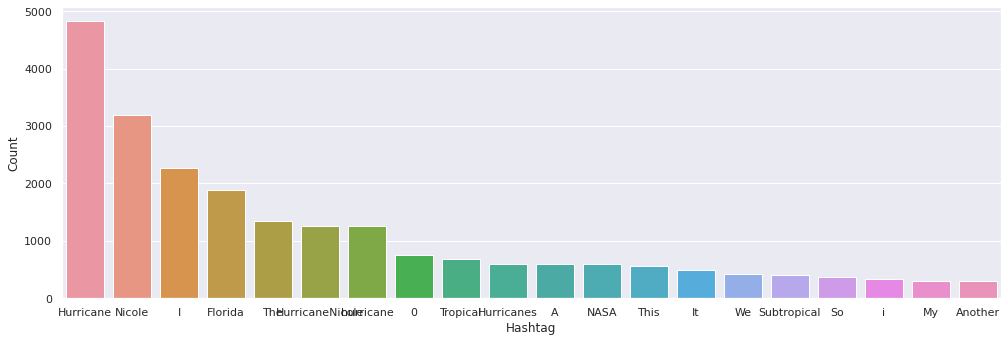

In [ ]:
# Visualizing the most common hashtags in the train data
a = nltk.FreqDist(ht_normal)

d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(15,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()   

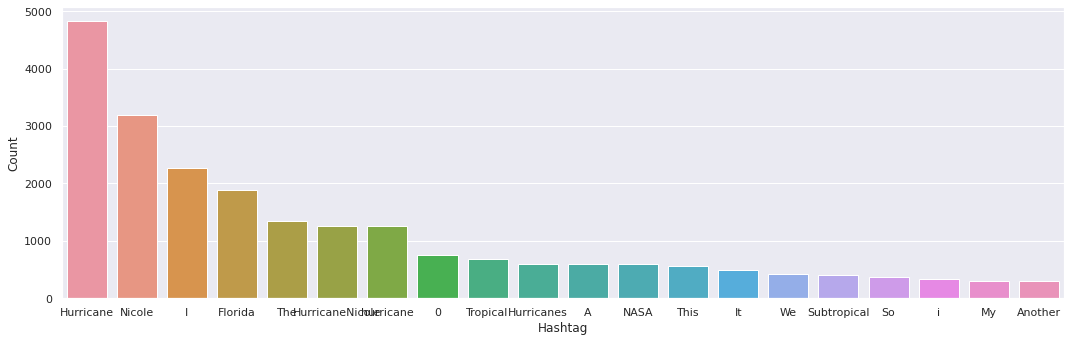

In [ ]:
a = nltk.FreqDist(ht_normal)

d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [ ]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(69774482, 87295420)